# Architecture of a Classification model

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |


# Making a Classification Model

In [1]:
from symtable import Class

from sklearn.datasets import make_circles



n_sample = 1000

# create the circle
X , y = make_circles(n_samples=n_sample,
                     factor=0.5,
                     noise=0.05,
                     random_state=42)

lets view the first 5 data

In [2]:
print(f"the first 5 data for x: {X[:5]}")
print(f"the second 5 data for y: {y[:5]}")

the first 5 data for x: [[ 0.45259239  0.16843331]
 [-0.43802652  0.11990049]
 [-0.5322243   0.18435902]
 [-0.30140181  0.40078207]
 [ 0.44560223 -0.89493556]]
the second 5 data for y: [1 1 1 1 0]


looks like there is a two x value per 1 y value

now lets convert this data into the pandas data frame

In [3]:
import pandas as pd
circles = pd.DataFrame({"X1" : X[:,0],
            "X2" : X[:,1],
            "lable" : y})
print(circles)

           X1        X2  lable
0    0.452592  0.168433      1
1   -0.438027  0.119900      1
2   -0.532224  0.184359      1
3   -0.301402  0.400782      1
4    0.445602 -0.894936      0
..        ...       ...    ...
995  0.249091  0.925787      0
996 -0.985370 -0.288162      0
997 -0.072016 -0.531447      1
998  0.660905 -0.793190      0
999  0.278415  0.967360      0

[1000 rows x 3 columns]


In [4]:
circles.head(10)

,X1,X2,lable
0,0.452592,0.168433,1
1,-0.438027,0.119900,1
2,-0.532224,0.184359,1
3,-0.301402,0.400782,1
4,0.445602,-0.894936,0
5,-0.284528,0.472151,1
6,-0.012276,0.505647,1
7,0.463617,0.110735,1
8,-0.115779,-0.505880,1
9,-0.110616,1.042207,0


In [5]:
circles.lable.unique()  # the labele class has a 2 value so it is  a binary classification

array([1, 0])

In [6]:
circles.lable.value_counts()

lable
1    500
0    500
Name: count, dtype: int64

lets visulize the data using the `matplotlib`

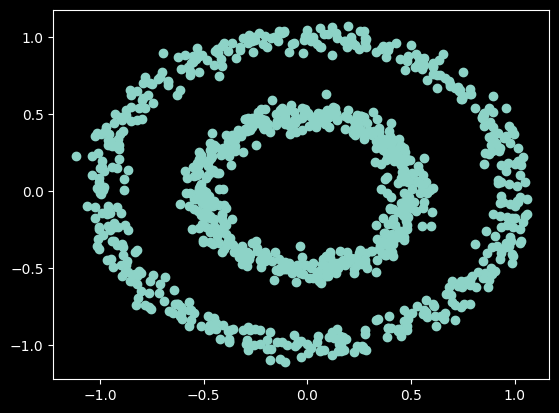

In [7]:
import matplotlib.pyplot as plt
plt.scatter(circles.X1, circles.X2,
        )

now we have created the dataset no we had to convert this dataset into an `tensor` so we can feed this data( tensor ) to our  pytorch model

In [8]:
# convert this numpy array to tensor data
import torch

X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.FloatTensor)
print(X)
print(y)

tensor([[ 0.4526,  0.1684],
        [-0.4380,  0.1199],
        [-0.5322,  0.1844],
        ...,
        [-0.0720, -0.5314],
        [ 0.6609, -0.7932],
        [ 0.2784,  0.9674]])
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 0.

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## Build Model

In [10]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Let's create a model class that:

1. Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
2. Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
3. Defines a forward() method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target device.

In [11]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
       def __init__(self):
           super().__init__()
           # 2 . create an 2 nn layer capable of handling shape of X and y
           self.layer1 = nn.Linear(in_features=2, out_features=5)
           self.layer2 = nn.Linear(in_features=5, out_features=2)
        # 3 define a forward pass for the computatioon
       def forward (self, x):
           # return the output of layer_2 ,  a single feature, the same shape as y
           return self.layer2(self.layer1(x)) # # computation goes through layer_1 first then the output of layer_1 goes through layer_2
model = CircleModelV0()
model.to(device)
model


CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=2, bias=True)
)

###  Setup loss Function and Optimizer

Hence this is a binary classification so we need to add an lossfunctionn for binary classification that is `Binary Cross Entropy Loss ` , specifically we will add    `BCELossWithLogits` that have built in sigmoid function

for Optimizer we will use `Stochastic Gradient Descent (SGD) optimizer`

In [12]:
loss_fn = torch.nn.BCEWithLogitsLoss()
# loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(model), lr=0.1)

also lets create an evaluation matrice fro model that is `accuracy`


In [13]:
def accuracy(y_pred, y_true):
    correct = torch.eq(y_pred, y_true).sum().item()  #  # torch.eq() calculates where two tensors are equal
    acc = ( correct / len(y_true) ) * 100
    return acc

## Train the  Model

#### steps for training loop

1. Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).
2. Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).
3. Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).
4. Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).
5. Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

In [14]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model(X_test.to(device))[:5]
y_logits

tensor([[-0.2920, -0.6553],
        [-0.3076, -0.6798],
        [-0.2694, -0.6060],
        [-0.3235, -0.7465],
        [-0.2232, -0.4321]], grad_fn=<SliceBackward0>)

In [15]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4275, 0.3418],
        [0.4237, 0.3363],
        [0.4331, 0.3530],
        [0.4198, 0.3216],
        [0.4444, 0.3936]], grad_fn=<SigmoidBackward0>)

To turn our prediction probabilities into prediction labels, we can round the outputs of the sigmoid activation function.

In [19]:
# round of the digit of pridiction probablities
y_pred = torch.round(y_pred_probs)
y_pred_label = torch.round(torch.sigmoid(model(X_test.to(device))[5]))

# check of equality
print(torch.equal(y_pred.squeeze(), y_pred_label.squeeze()))

y_pred.squeeze()


False


tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], grad_fn=<SqueezeBackward0>)

In [20]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

lets build an training loop

Let's start by training for 100 epochs and outputing the model's progress every 10 epochs.



In [21]:
torch.manual_seed(42)

epoch = 100

# insert data to training loop

X_train , X_test = X_train.to(device), X_test.to(device)
y_train , y_test = y_train.to(device), y_test.to(device)

# build train and test loop
for epoch in range(epoch):
    # training
    model.train()
    # 1 forward pass
    y_logits = model(X_train)
    y_pred = torch.round(torch.sigmoid(y_logits))
    # 2 loss function
    loss = loss_fn(y_logits, y_train)
    acc = accuracy(y_true=y_train, y_pred=y_pred)
    # 3 optimizer
    optimizer.zero_grad()
    # 4 Loss backward
    loss.backward()
    # 5 optimizer step
    optimizer.step()

    ## testing
    model.eval()
    with torch.inference_mode():
        # 1 forward pass
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2 calculate loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy(y_true=y_test, y_pred=test_pred)
    if epoch % 10 == 0:
        print(f"epoch: {epoch}, loss: {loss:.4f}, acc: {acc:.4f} | test loss: {test_loss:.4f}, test acc: {test_acc:.4f}")

ValueError: Target size (torch.Size([800])) must be the same as input size (torch.Size([800, 2]))